# Quantitative Report

Here we generate quantitative report of performance using RMSE, KL divergence, and Wasserstein distance.

In [14]:
import sys
sys.path.append("./source")

import harmonic
from lmmNet import *
import train_onestep
import predict_onestep
import predict_lmmNet
import train_lmmNet
from scipy.integrate import odeint

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

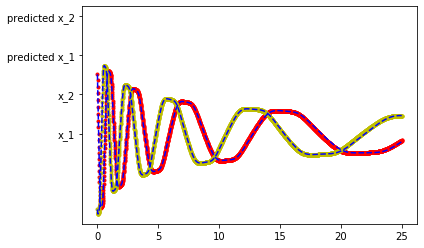

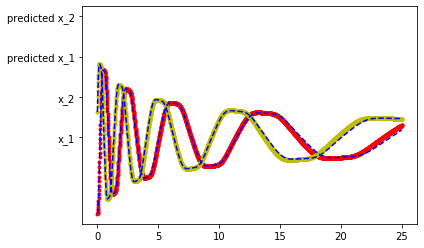

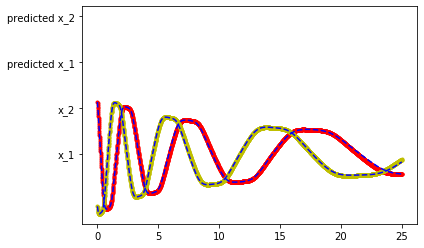

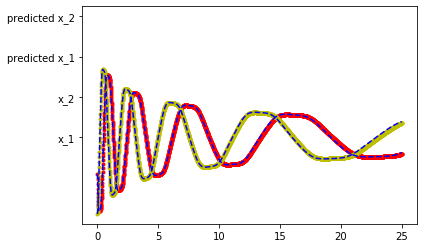

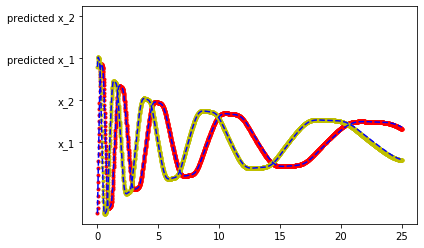

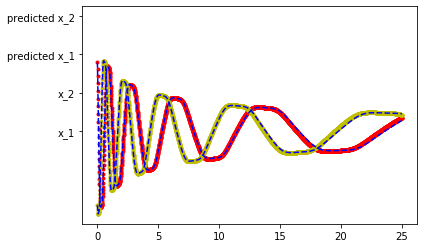

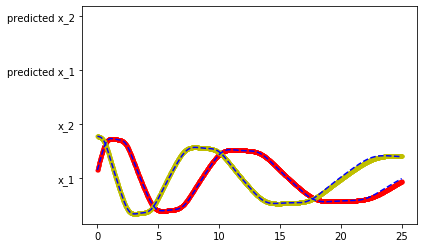

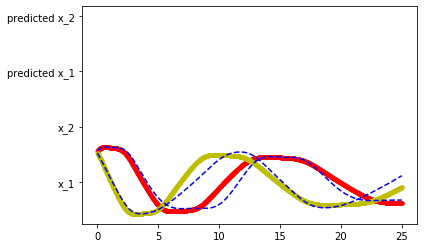

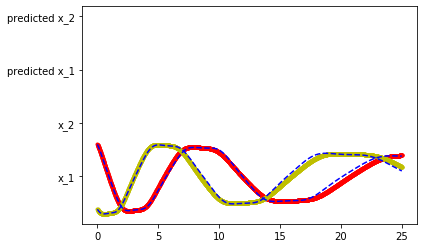

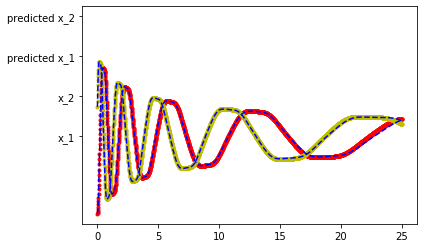

In [15]:
# list to contain the MSEs
MSE_list = []


for _ in range(10):
    # generate data with random initial conditions
    xi = np.random.uniform(-2, 2, 1)[0]
    yi = np.random.uniform(-2, 2, 1)[0]
    time_points, cubic_data = harmonic.simulate_custom(xinit=xi, yinit=yi)
    model = train_lmmNet.train_easy(time_points, cubic_data)
    x0 = np.array([xi, yi]) # initial conditions
    predicted_traj = odeint(lambda x, t: predict_lmmNet.predict_fn(x, t, model), x0, time_points)
    mse1 = predict_lmmNet.compute_MSE(predicted_traj, cubic_data[0], 0)
    mse2 = predict_lmmNet.compute_MSE(predicted_traj, cubic_data[0], 1)
    MSE_list.append((mse1, mse2))
    
    # plot
    plt.plot(time_points, cubic_data[0,:,0], 'r.', 'x_1')
    plt.plot(time_points, cubic_data[0,:,1], 'y.', 'x_2')
    plt.plot(time_points, predicted_traj[:,0], 'b--', 'predicted x_1')
    plt.plot(time_points, predicted_traj[:,1], 'b--', 'predicted x_2')
    plt.show()

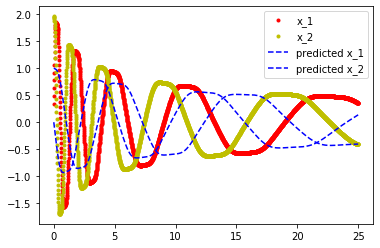

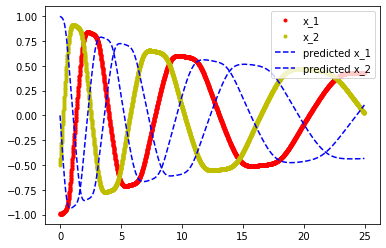

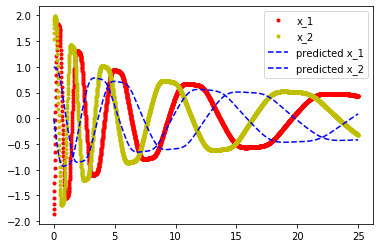

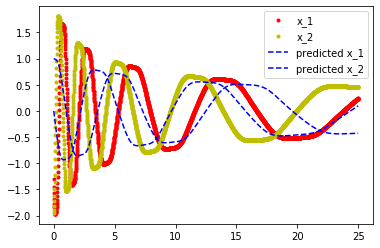

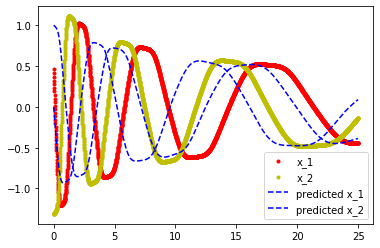

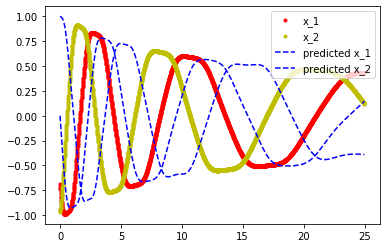

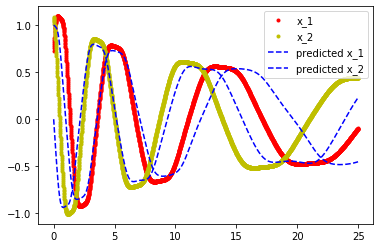

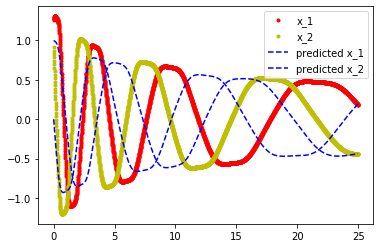

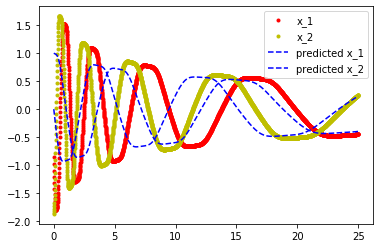

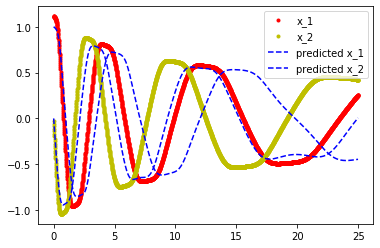

In [18]:
# now we do the same for the test data
mse_lmmnet_list = []
time_points, test_data = harmonic.simulate_custom(xinit=1, yinit=0)

for _ in range(10):
    # generate data with random initial conditions
    xi = np.random.uniform(-2, 2, 1)[0]
    yi = np.random.uniform(-2, 2, 1)[0]
    time_points, cubic_data = harmonic.simulate_custom(xinit=xi, yinit=yi)
    model = train_lmmNet.train_easy(time_points, cubic_data)
    x0 = test_data[0,0,:] # initial conditions
    predicted_traj = odeint(lambda x, t: predict_lmmNet.predict_fn(x, t, model), x0, time_points)
    mse1 = predict_lmmNet.compute_MSE(predicted_traj, test_data[0], 0)
    mse2 = predict_lmmNet.compute_MSE(predicted_traj, test_data[0], 1)
    mse_lmmnet_list.append((mse1, mse2))
    
    # plot
    plt.plot(time_points, cubic_data[0,:,0], 'r.', label='x_1')
    plt.plot(time_points, cubic_data[0,:,1], 'y.', label='x_2')
    plt.plot(time_points, predicted_traj[:,0], 'b--', label='predicted x_1')
    plt.plot(time_points, predicted_traj[:,1], 'b--', label='predicted x_2')
    plt.legend()
    plt.show()

In [20]:
import pickle

with open('mse_lmmnet.pkl', 'wb') as file:
    pickle.dump(mse_lmmnet_list, file)
    
with open('mse_onestep.pkl', 'wb') as file:
    pickle.dump(mse_onestep_list, file)

Now we repeat for the 3D Oscillator using both one-step learning and LmmNet. Also get SINDy results.

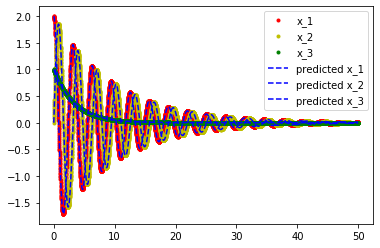

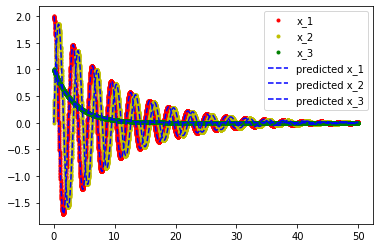

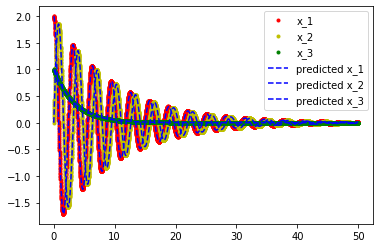

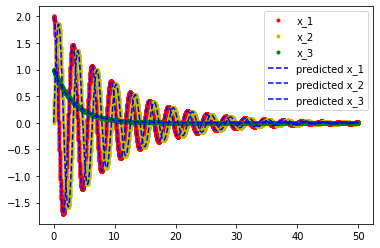

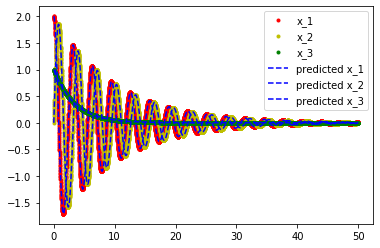

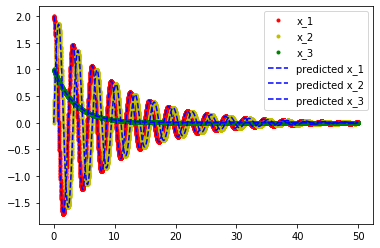

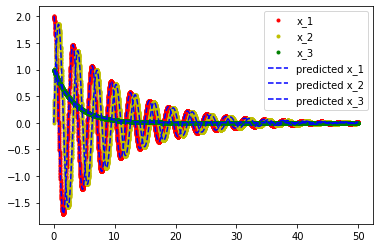

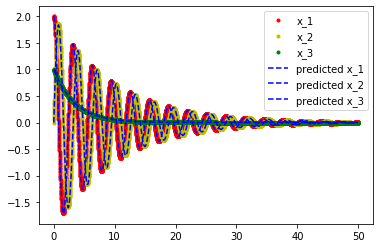

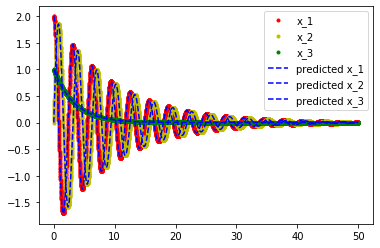

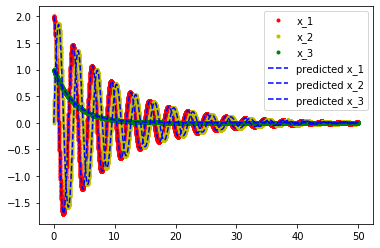

In [40]:
import linear

# now we do the same for 3D linear oscillator

mse_lmmnet_list = []
time_points, test_data = linear.simulate_default()

for _ in range(10):
    # generate data with random initial conditions
    xi = np.random.uniform(-2, 2, 1)[0]
    yi = np.random.uniform(-2, 2, 1)[0]
    zi = np.random.uniform(-2, 2, 1)[0]
    time_points, cubic_data = linear.simulate_custom(xinit=xi, yinit=yi, zinit=zi)
    model = train_lmmNet.train_easy(time_points, cubic_data)
    x0 = test_data[0,0,:] # initial conditions
    predicted_traj = odeint(lambda x, t: predict_lmmNet.predict_fn(x, t, model), x0, time_points)
    mse1 = predict_lmmNet.compute_MSE(predicted_traj, test_data[0], 0)
    mse2 = predict_lmmNet.compute_MSE(predicted_traj, test_data[0], 1)
    mse3 = predict_lmmNet.compute_MSE(predicted_traj, test_data[0], 2)
    mse_lmmnet_list.append((mse1, mse2, mse3))
    
    # plot
    plt.plot(time_points, test_data[0,:,0], 'r.', label='x_1')
    plt.plot(time_points, test_data[0,:,1], 'y.', label='x_2')
    plt.plot(time_points, test_data[0,:,2], 'g.', label='x_3')
    plt.plot(time_points, predicted_traj[:,0], 'b--', label='predicted x_1')
    plt.plot(time_points, predicted_traj[:,1], 'b--', label='predicted x_2')
    plt.plot(time_points, predicted_traj[:,2], 'b--', label='predicted x_3')
    plt.legend()
    plt.show()

Shape of the dataframe is: (5000, 4)
Shape of the dataframe is: (5000, 4)
Target: x_component, CV Pearson R2 coefficient: 0.999869
Target: y_component, CV Pearson R2 coefficient: 0.999872
Target: z_component, CV Pearson R2 coefficient: 0.999992
Average training score: 0.9999110370744152
Real data:


,x_component,y_component,z_component
Strain,,,
2,2.000000,0.000000,1.000000e+00
2,1.997601,0.039957,9.970045e-01
2,1.994407,0.079819,9.940180e-01
2,1.990421,0.119569,9.910403e-01
2,1.985645,0.159191,9.880717e-01
...,...,...,...
2,0.010936,-0.007990,3.105255e-07
2,0.011082,-0.007762,3.095953e-07
2,0.011224,-0.007531,3.086679e-07


Predicted data:


,x_component,y_component,z_component
Time,,,
0.00,2.000000,0.000000,1.000000
0.01,1.998776,0.039833,0.997202
0.02,1.996447,0.079345,0.994403
0.03,1.993755,0.118805,0.991605
0.04,1.989542,0.158265,0.988815
...,...,...,...
49.95,0.027243,-0.013423,-0.001494
49.96,0.027468,-0.012874,-0.001495
49.97,0.027680,-0.012319,-0.001496


./source/predict_onestep.py:217: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  rmse = math.sqrt(quad(integrand,min(times),max(times),limit=200)[0])
./source/predict_onestep.py:222: IntegrationWarning: The maximum number of subdivisions (200) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  rmsep = math.sqrt(quad(percent_integrand,min(times),max(times),limit=200)[0])


ML Fit: x_component 0.6232097928415339 RMSE percentage: 112.84963797015743
ML Fit: y_component 0.6220928270282274 RMSE percentage: 118.62897821892349


./source/predict_onestep.py:222: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  rmsep = math.sqrt(quad(percent_integrand,min(times),max(times),limit=200)[0])


ML Fit: z_component 0.020164968535650397 RMSE percentage: 1536.5233386155187
ML model aggregate error
Average RMSE: 0.4218225294684706
Total percentage error: 589.3339849348666


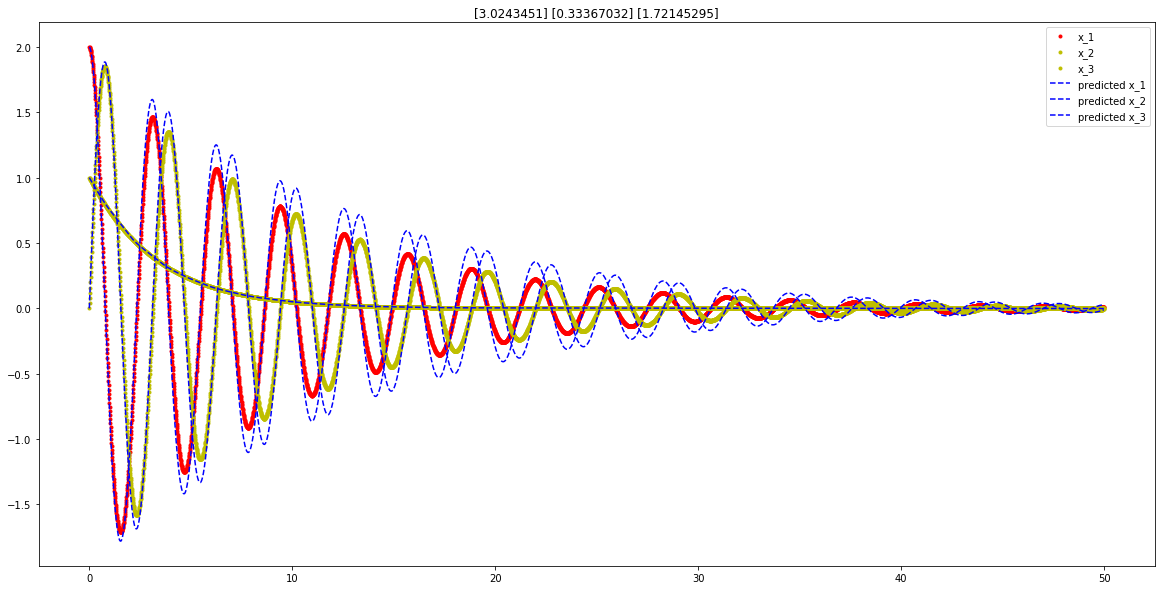

Shape of the dataframe is: (5000, 4)
Target: x_component, CV Pearson R2 coefficient: 0.999873
Target: y_component, CV Pearson R2 coefficient: 0.999877
Target: z_component, CV Pearson R2 coefficient: 0.999989
Average training score: 0.9999130372816151
Real data:


,x_component,y_component,z_component
Strain,,,
2,2.000000,0.000000,1.000000e+00
2,1.997601,0.039957,9.970045e-01
2,1.994407,0.079819,9.940180e-01
2,1.990421,0.119569,9.910403e-01
2,1.985645,0.159191,9.880717e-01
...,...,...,...
2,0.010936,-0.007990,3.105255e-07
2,0.011082,-0.007762,3.095953e-07
2,0.011224,-0.007531,3.086679e-07


Predicted data:


,x_component,y_component,z_component
Time,,,
0.00,2.000000,0.000000,1.000000
0.01,1.998658,0.040207,0.996832
0.02,1.996580,0.080415,0.993664
0.03,1.993591,0.120622,0.990496
0.04,1.989675,0.160402,0.987354
...,...,...,...
49.95,-0.005481,0.012901,-0.000438
49.96,-0.005737,0.012772,-0.000439
49.97,-0.005992,0.012629,-0.000441


./source/predict_onestep.py:217: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  rmse = math.sqrt(quad(integrand,min(times),max(times),limit=200)[0])
./source/predict_onestep.py:222: IntegrationWarning: The maximum number of subdivisions (200) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  rmsep = math.sqrt(quad(percent_integrand,min(times),max(times),limit=200)[0])


ML Fit: x_component 0.5685758770749241 RMSE percentage: 115.91947747085322
ML Fit: y_component 0.5688681427146722 RMSE percentage: 152.09970771821435


./source/predict_onestep.py:222: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  rmsep = math.sqrt(quad(percent_integrand,min(times),max(times),limit=200)[0])


ML Fit: z_component 0.04301982873717967 RMSE percentage: 790.9332381093546
ML model aggregate error
Average RMSE: 0.39348794950892535
Total percentage error: 352.98414109947413


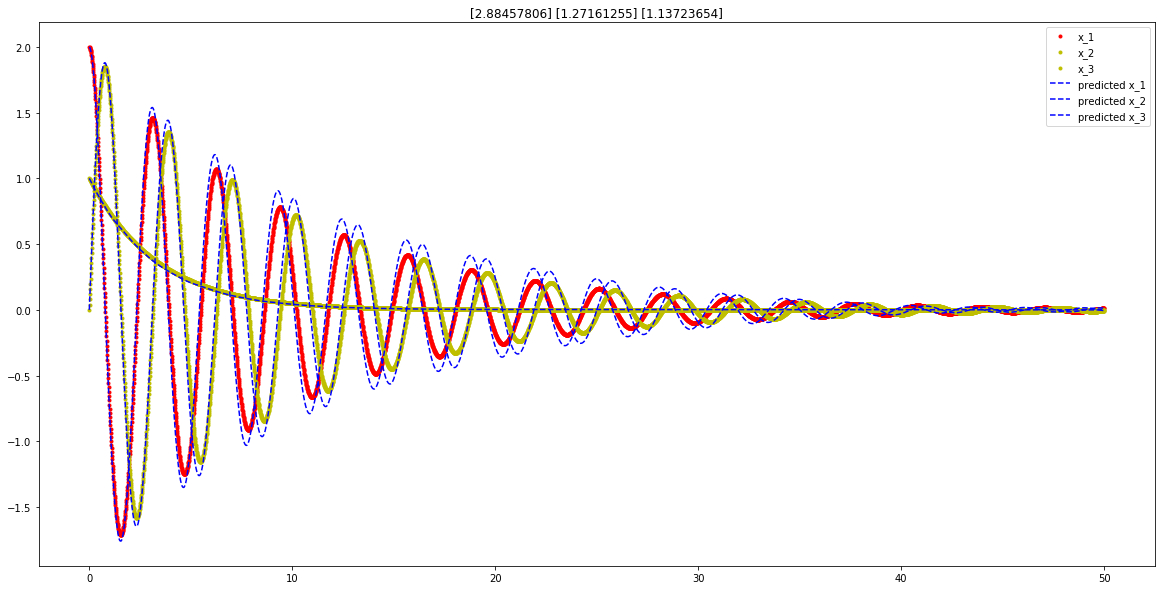

Shape of the dataframe is: (5000, 4)
Target: x_component, CV Pearson R2 coefficient: 0.999864
Target: y_component, CV Pearson R2 coefficient: 0.999860
Target: z_component, CV Pearson R2 coefficient: 0.999989
Average training score: 0.9999043481336249
Real data:


,x_component,y_component,z_component
Strain,,,
2,2.000000,0.000000,1.000000e+00
2,1.997601,0.039957,9.970045e-01
2,1.994407,0.079819,9.940180e-01
2,1.990421,0.119569,9.910403e-01
2,1.985645,0.159191,9.880717e-01
...,...,...,...
2,0.010936,-0.007990,3.105255e-07
2,0.011082,-0.007762,3.095953e-07
2,0.011224,-0.007531,3.086679e-07


Predicted data:


,x_component,y_component,z_component
Time,,,
0.00,2.000000,0.000000,1.000000
0.01,1.999238,0.038442,0.997306
0.02,1.997552,0.076855,0.994610
0.03,1.994461,0.115233,0.991913
0.04,1.990739,0.153606,0.989215
...,...,...,...
49.95,0.019392,-0.007386,-0.000365
49.96,0.019518,-0.006981,-0.000366
49.97,0.019631,-0.006573,-0.000367


./source/predict_onestep.py:217: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  rmse = math.sqrt(quad(integrand,min(times),max(times),limit=200)[0])
./source/predict_onestep.py:222: IntegrationWarning: The maximum number of subdivisions (200) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  rmsep = math.sqrt(quad(percent_integrand,min(times),max(times),limit=200)[0])


ML Fit: x_component 0.7745014336778361 RMSE percentage: 117.7952714244414
ML Fit: y_component 0.7731039530163483 RMSE percentage: 119.78826724446259


./source/predict_onestep.py:222: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  rmsep = math.sqrt(quad(percent_integrand,min(times),max(times),limit=200)[0])


ML Fit: z_component 0.0504037420834043 RMSE percentage: 730.3880419712858
ML model aggregate error
Average RMSE: 0.5326697095925296
Total percentage error: 322.65719354672996


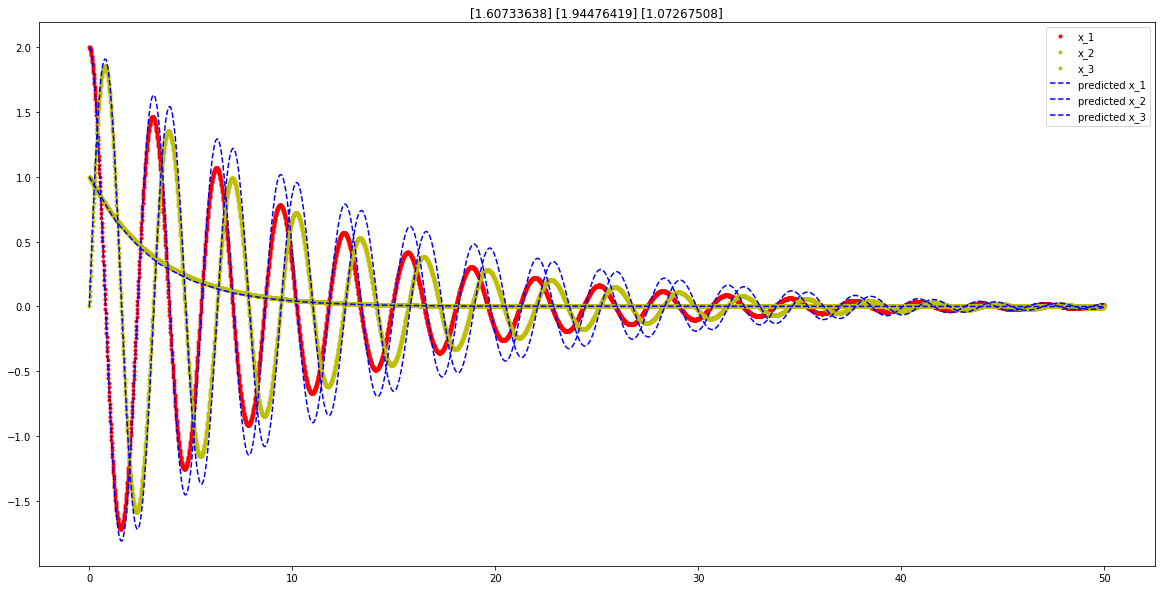

Shape of the dataframe is: (5000, 4)
Target: x_component, CV Pearson R2 coefficient: 0.999876
Target: y_component, CV Pearson R2 coefficient: 0.999865
Target: z_component, CV Pearson R2 coefficient: 0.999987
Average training score: 0.9999094150292768
Real data:


,x_component,y_component,z_component
Strain,,,
2,2.000000,0.000000,1.000000e+00
2,1.997601,0.039957,9.970045e-01
2,1.994407,0.079819,9.940180e-01
2,1.990421,0.119569,9.910403e-01
2,1.985645,0.159191,9.880717e-01
...,...,...,...
2,0.010936,-0.007990,3.105255e-07
2,0.011082,-0.007762,3.095953e-07
2,0.011224,-0.007531,3.086679e-07


Predicted data:


,x_component,y_component,z_component
Time,,,
0.00,2.000000,0.000000,1.000000
0.01,1.997526,0.040361,0.997339
0.02,1.995221,0.080616,0.994699
0.03,1.992006,0.120872,0.992058
0.04,1.987248,0.161128,0.989418
...,...,...,...
49.95,-0.013586,-0.010607,-0.000864
49.96,-0.013320,-0.010913,-0.000864
49.97,-0.013055,-0.011218,-0.000865


./source/predict_onestep.py:217: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  rmse = math.sqrt(quad(integrand,min(times),max(times),limit=200)[0])
./source/predict_onestep.py:222: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  rmsep = math.sqrt(quad(percent_integrand,min(times),max(times),limit=200)[0])


ML Fit: x_component 0.7557220359565547 RMSE percentage: 152.79180893745524


./source/predict_onestep.py:222: IntegrationWarning: The maximum number of subdivisions (200) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  rmsep = math.sqrt(quad(percent_integrand,min(times),max(times),limit=200)[0])


ML Fit: y_component 0.7577879093395282 RMSE percentage: 170.17888012574159


./source/predict_onestep.py:222: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  rmsep = math.sqrt(quad(percent_integrand,min(times),max(times),limit=200)[0])


ML Fit: z_component 0.03280313909933527 RMSE percentage: 1139.265193546549
ML model aggregate error
Average RMSE: 0.5154376947984728
Total percentage error: 487.4119608699153


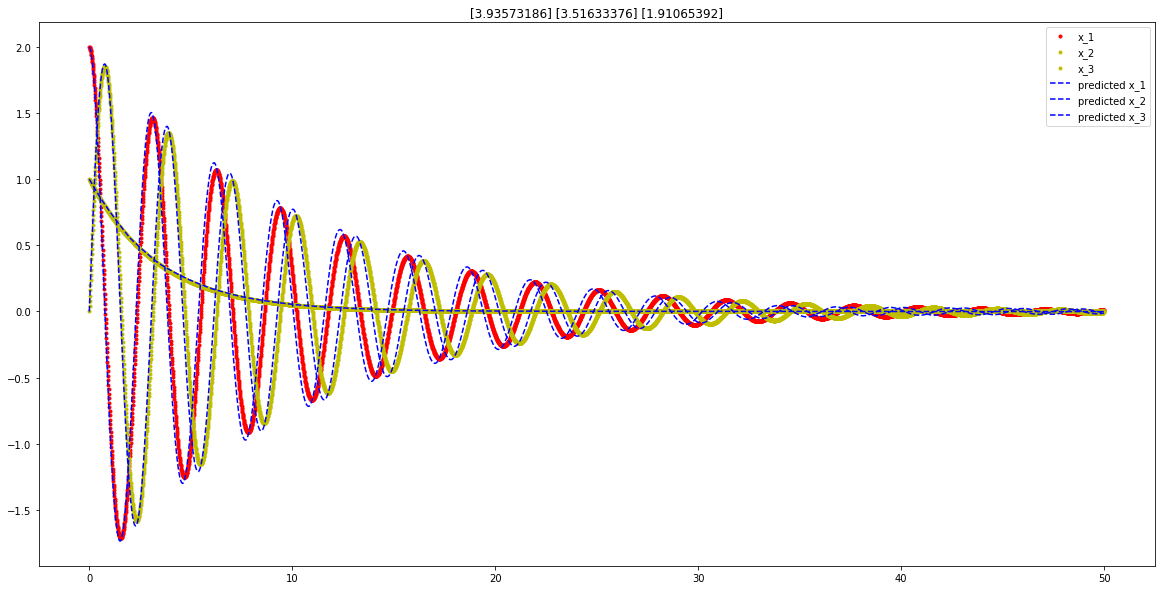

Shape of the dataframe is: (5000, 4)
Target: x_component, CV Pearson R2 coefficient: 0.999865
Target: y_component, CV Pearson R2 coefficient: 0.999867
Target: z_component, CV Pearson R2 coefficient: 0.999992
Average training score: 0.9999080150000061
Real data:


,x_component,y_component,z_component
Strain,,,
2,2.000000,0.000000,1.000000e+00
2,1.997601,0.039957,9.970045e-01
2,1.994407,0.079819,9.940180e-01
2,1.990421,0.119569,9.910403e-01
2,1.985645,0.159191,9.880717e-01
...,...,...,...
2,0.010936,-0.007990,3.105255e-07
2,0.011082,-0.007762,3.095953e-07
2,0.011224,-0.007531,3.086679e-07


Predicted data:


,x_component,y_component,z_component
Time,,,
0.00,2.000000,0.000000,1.000000
0.01,1.998693,0.040401,0.997343
0.02,1.997459,0.080802,0.994703
0.03,1.994308,0.121202,0.992075
0.04,1.990225,0.161626,0.989448
...,...,...,...
49.95,-0.009519,0.014004,-0.000956
49.96,-0.009808,0.013774,-0.000958
49.97,-0.010093,0.013538,-0.000959


./source/predict_onestep.py:217: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  rmse = math.sqrt(quad(integrand,min(times),max(times),limit=200)[0])
./source/predict_onestep.py:222: IntegrationWarning: The maximum number of subdivisions (200) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  rmsep = math.sqrt(quad(percent_integrand,min(times),max(times),limit=200)[0])


ML Fit: x_component 0.7783725266253505 RMSE percentage: 161.32133117147265
ML Fit: y_component 0.7792170822662956 RMSE percentage: 171.24124688089307


./source/predict_onestep.py:222: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  rmsep = math.sqrt(quad(percent_integrand,min(times),max(times),limit=200)[0])


ML Fit: z_component 0.04594610436317475 RMSE percentage: 1152.5992554451987
ML model aggregate error
Average RMSE: 0.5345119044182737
Total percentage error: 495.05394449918816


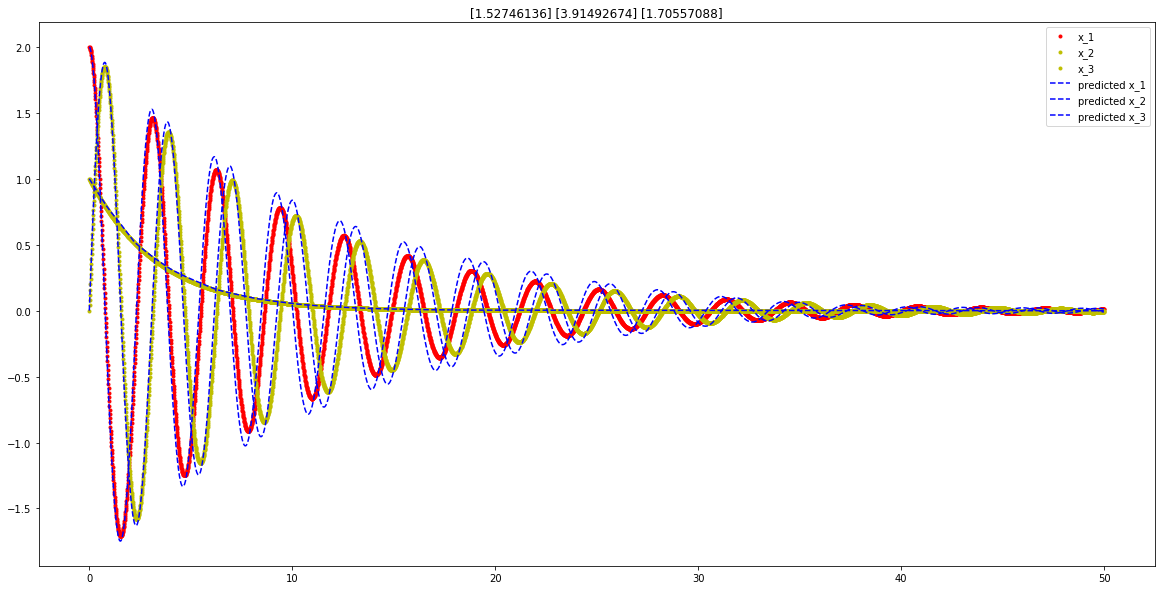

Shape of the dataframe is: (5000, 4)
Target: x_component, CV Pearson R2 coefficient: 0.999878
Target: y_component, CV Pearson R2 coefficient: 0.999866
Target: z_component, CV Pearson R2 coefficient: 0.999991
Average training score: 0.9999115514299673
Real data:


,x_component,y_component,z_component
Strain,,,
2,2.000000,0.000000,1.000000e+00
2,1.997601,0.039957,9.970045e-01
2,1.994407,0.079819,9.940180e-01
2,1.990421,0.119569,9.910403e-01
2,1.985645,0.159191,9.880717e-01
...,...,...,...
2,0.010936,-0.007990,3.105255e-07
2,0.011082,-0.007762,3.095953e-07
2,0.011224,-0.007531,3.086679e-07


Predicted data:


,x_component,y_component,z_component
Time,,,
0.00,2.000000,0.000000,1.000000
0.01,1.998751,0.039800,0.996919
0.02,1.996408,0.079585,0.993837
0.03,1.993455,0.119306,0.990755
0.04,1.989654,0.159003,0.987672
...,...,...,...
49.95,-0.003021,0.007051,-0.000470
49.96,-0.003168,0.006975,-0.000471
49.97,-0.003314,0.006894,-0.000472


./source/predict_onestep.py:217: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  rmse = math.sqrt(quad(integrand,min(times),max(times),limit=200)[0])
./source/predict_onestep.py:222: IntegrationWarning: The maximum number of subdivisions (200) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  rmsep = math.sqrt(quad(percent_integrand,min(times),max(times),limit=200)[0])


ML Fit: x_component 0.55618369063448 RMSE percentage: 144.73517024977127
ML Fit: y_component 0.5572860488304312 RMSE percentage: 95.70508595782562


./source/predict_onestep.py:222: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  rmsep = math.sqrt(quad(percent_integrand,min(times),max(times),limit=200)[0])


ML Fit: z_component 0.02207821708419854 RMSE percentage: 825.6038999179832
ML model aggregate error
Average RMSE: 0.37851598551636995
Total percentage error: 355.34805204186006


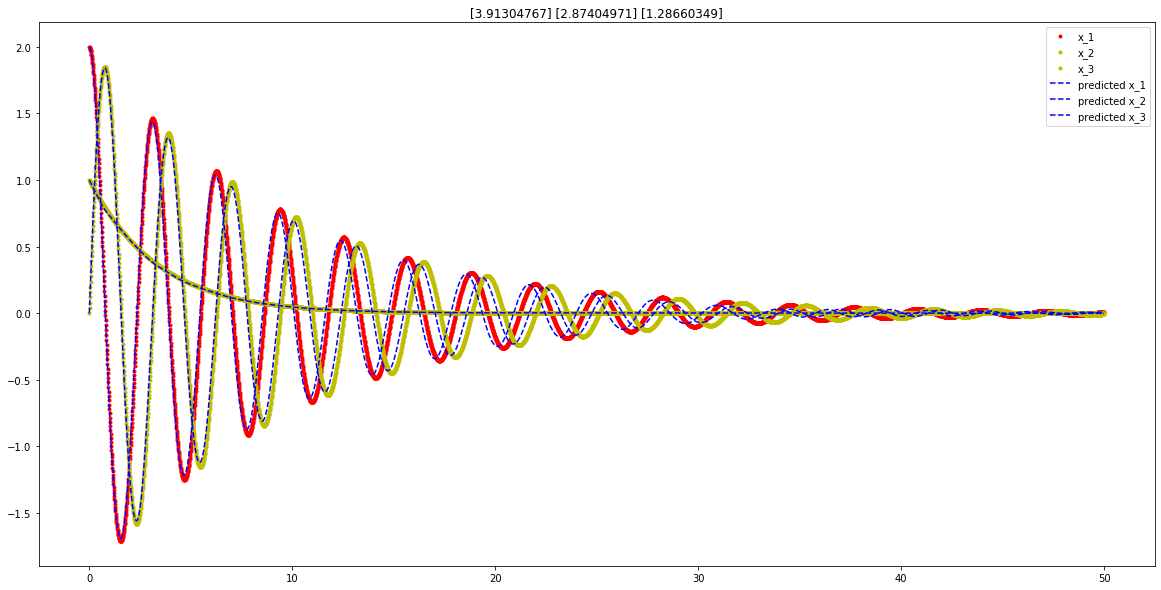

Shape of the dataframe is: (5000, 4)
Target: x_component, CV Pearson R2 coefficient: 0.999882
Target: y_component, CV Pearson R2 coefficient: 0.999853
Target: z_component, CV Pearson R2 coefficient: 0.999992
Average training score: 0.9999089824011279
Real data:


,x_component,y_component,z_component
Strain,,,
2,2.000000,0.000000,1.000000e+00
2,1.997601,0.039957,9.970045e-01
2,1.994407,0.079819,9.940180e-01
2,1.990421,0.119569,9.910403e-01
2,1.985645,0.159191,9.880717e-01
...,...,...,...
2,0.010936,-0.007990,3.105255e-07
2,0.011082,-0.007762,3.095953e-07
2,0.011224,-0.007531,3.086679e-07


Predicted data:


,x_component,y_component,z_component
Time,,,
0.00,2.000000,0.000000,1.000000
0.01,1.997948,0.041686,0.997313
0.02,1.996124,0.083373,0.994636
0.03,1.992740,0.125059,0.991958
0.04,1.988052,0.166745,0.989280
...,...,...,...
49.95,0.009704,-0.001026,-0.001265
49.96,0.009692,-0.000800,-0.001266
49.97,0.009681,-0.000574,-0.001268


./source/predict_onestep.py:217: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  rmse = math.sqrt(quad(integrand,min(times),max(times),limit=200)[0])
./source/predict_onestep.py:222: IntegrationWarning: The maximum number of subdivisions (200) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  rmsep = math.sqrt(quad(percent_integrand,min(times),max(times),limit=200)[0])


ML Fit: x_component 1.1031751212671577 RMSE percentage: 144.5655067339378
ML Fit: y_component 1.1010621809189463 RMSE percentage: 247.07206505776256


./source/predict_onestep.py:222: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  rmsep = math.sqrt(quad(percent_integrand,min(times),max(times),limit=200)[0])


ML Fit: z_component 0.036883106486462855 RMSE percentage: 1365.2936427030734
ML model aggregate error
Average RMSE: 0.7470401362241889
Total percentage error: 585.6437381649246


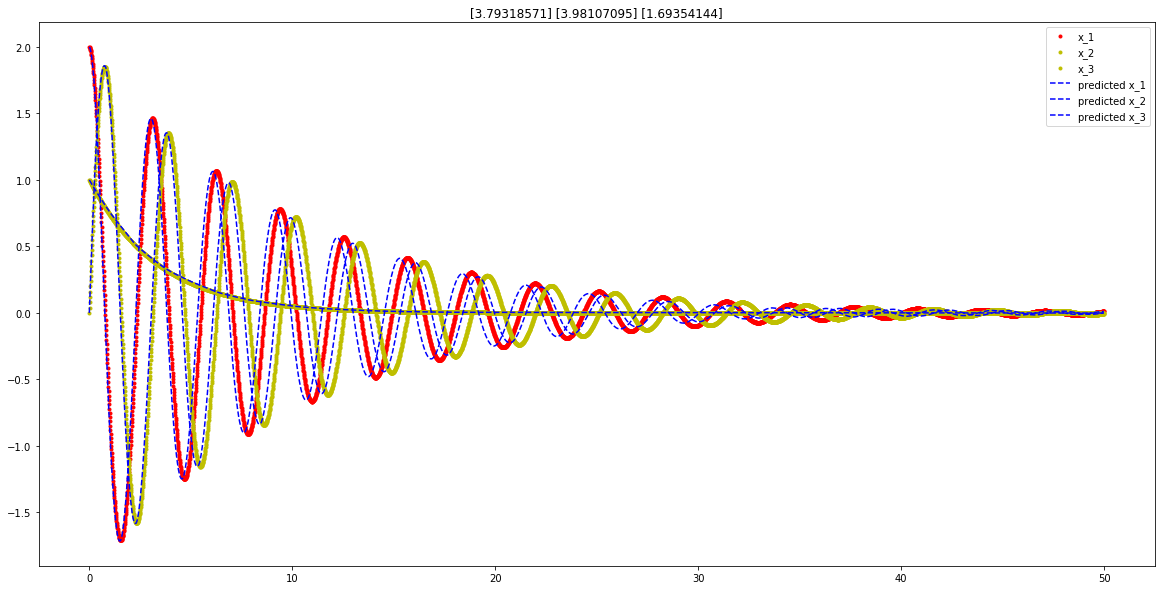

Shape of the dataframe is: (5000, 4)
Target: x_component, CV Pearson R2 coefficient: 0.999877
Target: y_component, CV Pearson R2 coefficient: 0.999864
Target: z_component, CV Pearson R2 coefficient: 0.999993
Average training score: 0.9999113999105943
Real data:


,x_component,y_component,z_component
Strain,,,
2,2.000000,0.000000,1.000000e+00
2,1.997601,0.039957,9.970045e-01
2,1.994407,0.079819,9.940180e-01
2,1.990421,0.119569,9.910403e-01
2,1.985645,0.159191,9.880717e-01
...,...,...,...
2,0.010936,-0.007990,3.105255e-07
2,0.011082,-0.007762,3.095953e-07
2,0.011224,-0.007531,3.086679e-07


Predicted data:


,x_component,y_component,z_component
Time,,,
0.00,2.000000,0.000000,1.000000
0.01,1.998451,0.041754,0.997214
0.02,1.995324,0.083461,0.994434
0.03,1.991859,0.125167,0.991661
0.04,1.987784,0.166874,0.988889
...,...,...,...
49.95,-0.003512,0.018248,-0.001171
49.96,-0.003889,0.018142,-0.001173
49.97,-0.004257,0.018032,-0.001174


./source/predict_onestep.py:217: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  rmse = math.sqrt(quad(integrand,min(times),max(times),limit=200)[0])
./source/predict_onestep.py:222: IntegrationWarning: The maximum number of subdivisions (200) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  rmsep = math.sqrt(quad(percent_integrand,min(times),max(times),limit=200)[0])


ML Fit: x_component 0.8622224584873397 RMSE percentage: 172.3182110443374
ML Fit: y_component 0.8637236173752461 RMSE percentage: 173.9368488954561


./source/predict_onestep.py:222: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  rmsep = math.sqrt(quad(percent_integrand,min(times),max(times),limit=200)[0])


ML Fit: z_component 0.036591572617451176 RMSE percentage: 1303.3600490550284
ML model aggregate error
Average RMSE: 0.5875125494933456
Total percentage error: 549.871702998274


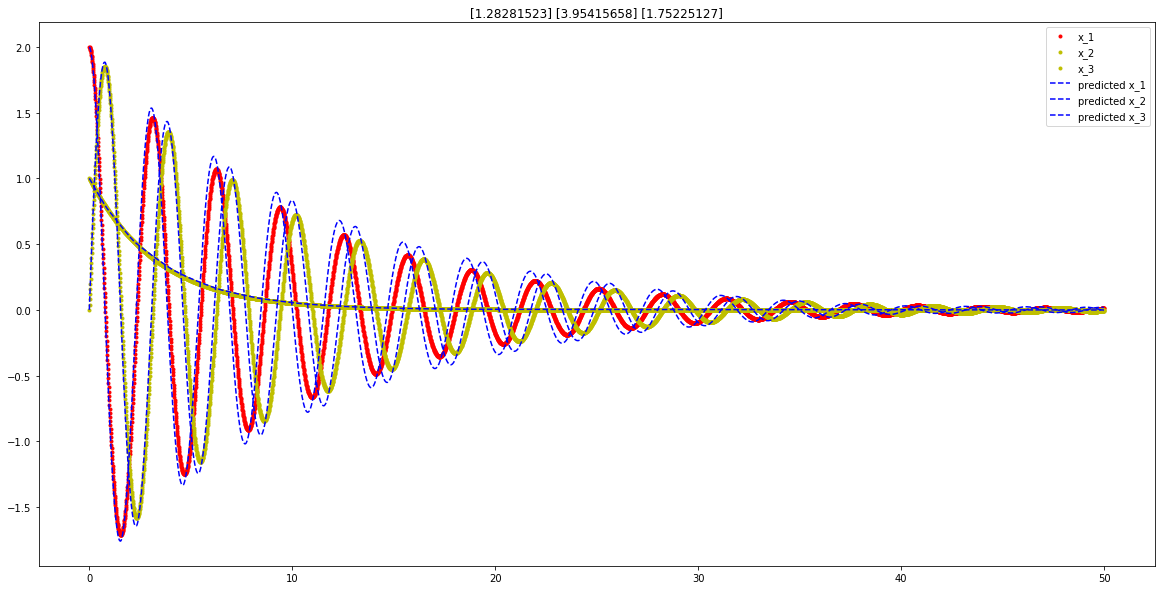

Shape of the dataframe is: (5000, 4)
Target: x_component, CV Pearson R2 coefficient: 0.999867
Target: y_component, CV Pearson R2 coefficient: 0.999848
Target: z_component, CV Pearson R2 coefficient: 0.999992
Average training score: 0.9999024341631905
Real data:


,x_component,y_component,z_component
Strain,,,
2,2.000000,0.000000,1.000000e+00
2,1.997601,0.039957,9.970045e-01
2,1.994407,0.079819,9.940180e-01
2,1.990421,0.119569,9.910403e-01
2,1.985645,0.159191,9.880717e-01
...,...,...,...
2,0.010936,-0.007990,3.105255e-07
2,0.011082,-0.007762,3.095953e-07
2,0.011224,-0.007531,3.086679e-07


Predicted data:


,x_component,y_component,z_component
Time,,,
0.00,2.000000,0.000000,1.000000
0.01,1.998969,0.036440,0.997263
0.02,1.996875,0.072786,0.994536
0.03,1.994086,0.109108,0.991822
0.04,1.990789,0.145394,0.989110
...,...,...,...
49.95,0.013731,-0.044406,-0.001204
49.96,0.014586,-0.044093,-0.001205
49.97,0.015428,-0.043766,-0.001206


./source/predict_onestep.py:217: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  rmse = math.sqrt(quad(integrand,min(times),max(times),limit=200)[0])
./source/predict_onestep.py:222: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  rmsep = math.sqrt(quad(percent_integrand,min(times),max(times),limit=200)[0])


ML Fit: x_component 1.1465195320654935 RMSE percentage: 153.2852817086111


./source/predict_onestep.py:222: IntegrationWarning: The maximum number of subdivisions (200) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  rmsep = math.sqrt(quad(percent_integrand,min(times),max(times),limit=200)[0])


ML Fit: y_component 1.1478030665821655 RMSE percentage: 219.21710927108222


./source/predict_onestep.py:222: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  rmsep = math.sqrt(quad(percent_integrand,min(times),max(times),limit=200)[0])


ML Fit: z_component 0.05069051758622392 RMSE percentage: 1375.509185557369
ML model aggregate error
Average RMSE: 0.7816710387446276
Total percentage error: 582.670525512354


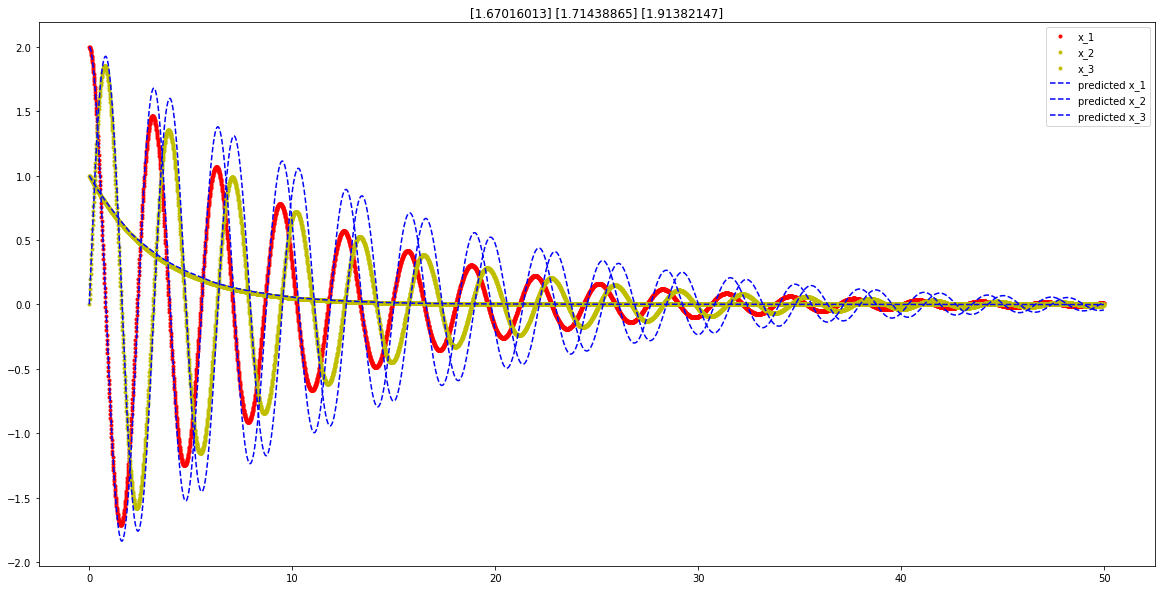

Shape of the dataframe is: (5000, 4)
Target: x_component, CV Pearson R2 coefficient: 0.999872
Target: y_component, CV Pearson R2 coefficient: 0.999872
Target: z_component, CV Pearson R2 coefficient: 0.999993
Average training score: 0.9999125480206423
Real data:


,x_component,y_component,z_component
Strain,,,
2,2.000000,0.000000,1.000000e+00
2,1.997601,0.039957,9.970045e-01
2,1.994407,0.079819,9.940180e-01
2,1.990421,0.119569,9.910403e-01
2,1.985645,0.159191,9.880717e-01
...,...,...,...
2,0.010936,-0.007990,3.105255e-07
2,0.011082,-0.007762,3.095953e-07
2,0.011224,-0.007531,3.086679e-07


Predicted data:


,x_component,y_component,z_component
Time,,,
0.00,2.000000,0.000000,1.000000
0.01,1.998937,0.039957,0.997317
0.02,1.996784,0.079885,0.994636
0.03,1.993786,0.119787,0.991958
0.04,1.989693,0.159617,0.989288
...,...,...,...
49.95,0.024173,-0.026541,-0.001287
49.96,0.024674,-0.026027,-0.001288
49.97,0.025164,-0.025499,-0.001289


./source/predict_onestep.py:217: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  rmse = math.sqrt(quad(integrand,min(times),max(times),limit=200)[0])
./source/predict_onestep.py:222: IntegrationWarning: The maximum number of subdivisions (200) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  rmsep = math.sqrt(quad(percent_integrand,min(times),max(times),limit=200)[0])


ML Fit: x_component 0.7961110228738129 RMSE percentage: 133.14858815874464
ML Fit: y_component 0.7986989618725214 RMSE percentage: 139.78063961778903
ML Fit: z_component 0.04227318716240843 RMSE percentage: 1423.374729619244
ML model aggregate error
Average RMSE: 0.5456943906362476
Total percentage error: 565.4346524652592


./source/predict_onestep.py:222: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  rmsep = math.sqrt(quad(percent_integrand,min(times),max(times),limit=200)[0])


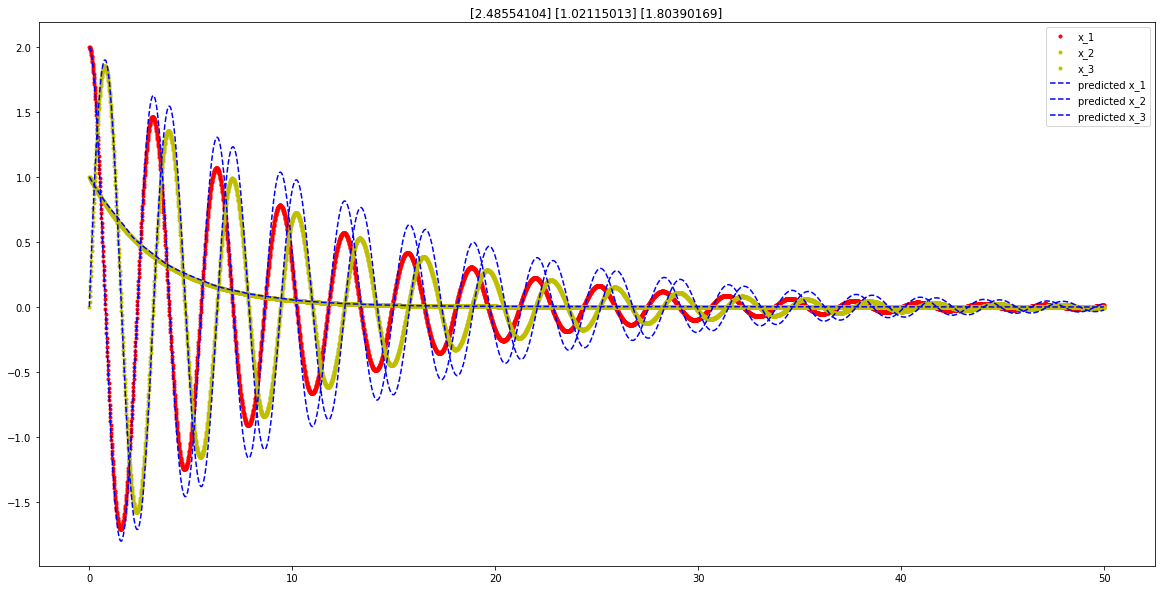

In [66]:
from utils import *
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor

# now for one-step method
# now we do the same for the test data
mse_onestep_list = []
time_points, test_data = linear.simulate_default()

feature_list = [] # here we do not have external time-series or control variables
target_list = ['x_component', 'y_component', 'z_component']
df_test = create_data(test_data, time_points, cols=target_list, num=2)

for _ in range(10):
    # generate data with random initial conditions
    xi = np.random.uniform(1, 4, 1)
    yi = np.random.uniform(0, 4, 1)
    zi = np.random.uniform(1, 2, 1)
    time_points, data1 = linear.simulate_custom(xinit=xi[0], yinit=yi[0], zinit=zi[0])
    #time_points, data1 = linear.simulate_custom(xinit=xi[1], yinit=yi[1], zinit=zi[1])

    # now generate and augment the training dataset
    df = create_data(data1, time_points, cols=target_list, num=0)
    #df2 = create_data(data2, time_points, cols=target_list, num=1)
    #df = pd.concat([df1, df2])
    df_train = train_onestep.generate_dataset(df, [0],feature_list, target_list, n_dim=2500)

    rf_model = RandomForestRegressor(n_estimators=20)
    figure_path = './plots/'
    rf_dict, score_dict = train_onestep.train_classic(df_train, rf_model, plot=False,model_type='random_forest', figure_path=figure_path)
    time_points, predictions = predict_onestep.predict_integrate(df_test, df, rf_dict, target_list, feature_list, title='test', plot=False,model_type='random_forest', subplots=(3,1), bio=False)
    predictions = predictions.to_numpy()
    mse1 = predict_lmmNet.compute_MSE(predictions, test_data[0], 0)
    mse2 = predict_lmmNet.compute_MSE(predictions, test_data[0], 1)
    mse3 = predict_lmmNet.compute_MSE(predictions, test_data[0], 2)
    mse_onestep_list.append((mse1, mse2, mse3))
    
    # plot
    plt.figure(figsize=(20, 10))
    plt.plot(time_points, test_data[0,:,0], 'r.', label='x_1')
    plt.plot(time_points, test_data[0,:,1], 'y.', label='x_2')
    plt.plot(time_points, test_data[0,:,2], 'y.', label='x_3')
    plt.plot(time_points, predictions[:,0], 'b--', label='predicted x_1')
    plt.plot(time_points, predictions[:,1], 'b--', label='predicted x_2')
    plt.plot(time_points, predictions[:,2], 'b--', label='predicted x_3')
    plt.title(str(xi) + " " + str(yi) + " " + str(zi))
    plt.legend()
    plt.show()

Shape of the dataframe is: (2500, 3)
Shape of the dataframe is: (2500, 3)
Shape of the dataframe is: (2500, 3)
Target: x_component, CV Pearson R2 coefficient: 0.999706
Target: y_component, CV Pearson R2 coefficient: 0.999795
Average training score: 0.9997504700270224
Real data:


,x_component,y_component
Strain,,
2,2.000000,0.000000
2,1.992028,-0.159044
2,1.983873,-0.316164
2,1.974847,-0.471225
2,1.963856,-0.623866
...,...,...
2,-0.441769,-0.288236
2,-0.442157,-0.286486
2,-0.442536,-0.284731


Predicted data:


,x_component,y_component
Time,,
0.00,2.000000,0.000000
0.01,1.993812,-0.131797
0.02,1.987597,-0.262822
0.03,1.981855,-0.393305
0.04,1.976406,-0.523666
...,...,...
24.95,-0.257047,0.467809
24.96,-0.254873,0.468015
24.97,-0.252698,0.468203


./source/predict_onestep.py:217: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  rmse = math.sqrt(quad(integrand,min(times),max(times),limit=200)[0])
./source/predict_onestep.py:222: IntegrationWarning: The maximum number of subdivisions (200) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  rmsep = math.sqrt(quad(percent_integrand,min(times),max(times),limit=200)[0])


ML Fit: x_component 3.7550993007371773 RMSE percentage: 247.97179880737218
ML Fit: y_component 3.8179297291026466 RMSE percentage: 239.1519027645995
ML model aggregate error
Average RMSE: 3.786514514919912
Total percentage error: 243.56185078598585


./source/predict_onestep.py:222: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  rmsep = math.sqrt(quad(percent_integrand,min(times),max(times),limit=200)[0])


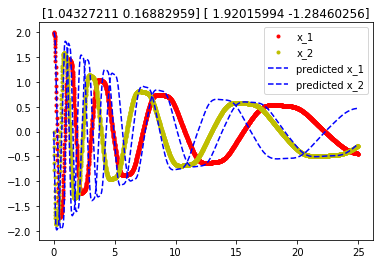

Shape of the dataframe is: (2500, 3)
Shape of the dataframe is: (2500, 3)
Target: x_component, CV Pearson R2 coefficient: 0.999802
Target: y_component, CV Pearson R2 coefficient: 0.999848
Average training score: 0.9998252589181447
Real data:


,x_component,y_component
Strain,,
2,2.000000,0.000000
2,1.992028,-0.159044
2,1.983873,-0.316164
2,1.974847,-0.471225
2,1.963856,-0.623866
...,...,...
2,-0.441769,-0.288236
2,-0.442157,-0.286486
2,-0.442536,-0.284731


Predicted data:


,x_component,y_component
Time,,
0.00,2.000000,0.000000
0.01,1.996745,-0.077902
0.02,1.993483,-0.155804
0.03,1.990179,-0.233706
0.04,1.986816,-0.311609
...,...,...
24.95,0.456898,0.172127
24.96,0.456862,0.170109
24.97,0.456824,0.168092


./source/predict_onestep.py:217: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  rmse = math.sqrt(quad(integrand,min(times),max(times),limit=200)[0])
./source/predict_onestep.py:222: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  rmsep = math.sqrt(quad(percent_integrand,min(times),max(times),limit=200)[0])


ML Fit: x_component 4.7245267885436855 RMSE percentage: 182.82944803101665
ML Fit: y_component 4.803369721797675 RMSE percentage: 173.3912260273304
ML model aggregate error
Average RMSE: 4.76394825517068
Total percentage error: 178.11033702917354


./source/predict_onestep.py:222: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  rmsep = math.sqrt(quad(percent_integrand,min(times),max(times),limit=200)[0])


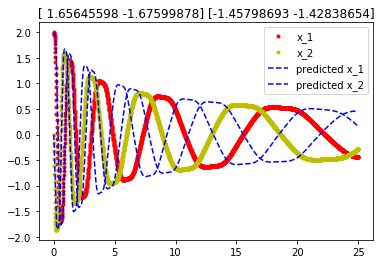

Shape of the dataframe is: (2500, 3)
Shape of the dataframe is: (2500, 3)
Target: x_component, CV Pearson R2 coefficient: 0.999826
Target: y_component, CV Pearson R2 coefficient: 0.999761
Average training score: 0.9997936974555224
Real data:


,x_component,y_component
Strain,,
2,2.000000,0.000000
2,1.992028,-0.159044
2,1.983873,-0.316164
2,1.974847,-0.471225
2,1.963856,-0.623866
...,...,...
2,-0.441769,-0.288236
2,-0.442157,-0.286486
2,-0.442536,-0.284731


Predicted data:


,x_component,y_component
Time,,
0.00,2.000000,0.000000
0.01,1.997675,-0.069713
0.02,1.995350,-0.139426
0.03,1.993007,-0.209139
0.04,1.990605,-0.278852
...,...,...
24.95,0.465232,0.191124
24.96,0.465283,0.189025
24.97,0.465331,0.186927


./source/predict_onestep.py:217: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  rmse = math.sqrt(quad(integrand,min(times),max(times),limit=200)[0])
./source/predict_onestep.py:222: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  rmsep = math.sqrt(quad(percent_integrand,min(times),max(times),limit=200)[0])


ML Fit: x_component 4.733546240255906 RMSE percentage: 193.99973437356098
ML Fit: y_component 4.817845268580089 RMSE percentage: 169.6771844004799
ML model aggregate error
Average RMSE: 4.775695754417997
Total percentage error: 181.83845938702044


./source/predict_onestep.py:222: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  rmsep = math.sqrt(quad(percent_integrand,min(times),max(times),limit=200)[0])


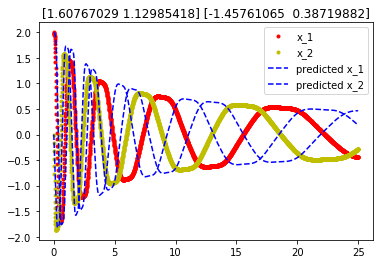

Shape of the dataframe is: (2500, 3)
Shape of the dataframe is: (2500, 3)
Target: x_component, CV Pearson R2 coefficient: 0.999905
Target: y_component, CV Pearson R2 coefficient: 0.999864
Average training score: 0.9998844953755537
Real data:


,x_component,y_component
Strain,,
2,2.000000,0.000000
2,1.992028,-0.159044
2,1.983873,-0.316164
2,1.974847,-0.471225
2,1.963856,-0.623866
...,...,...
2,-0.441769,-0.288236
2,-0.442157,-0.286486
2,-0.442536,-0.284731


Predicted data:


,x_component,y_component
Time,,
0.00,2.000000,0.000000
0.01,1.998645,-0.031414
0.02,1.997291,-0.062829
0.03,1.995936,-0.094243
0.04,1.994578,-0.125657
...,...,...
24.95,-0.358902,-0.393838
24.96,-0.360205,-0.392768
24.97,-0.361505,-0.391690


./source/predict_onestep.py:217: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  rmse = math.sqrt(quad(integrand,min(times),max(times),limit=200)[0])
./source/predict_onestep.py:222: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  rmsep = math.sqrt(quad(percent_integrand,min(times),max(times),limit=200)[0])


ML Fit: x_component 4.45695499664737 RMSE percentage: 241.77042806699984
ML Fit: y_component 4.2487591655826 RMSE percentage: 192.74471843906952
ML model aggregate error
Average RMSE: 4.352857081114985
Total percentage error: 217.25757325303468


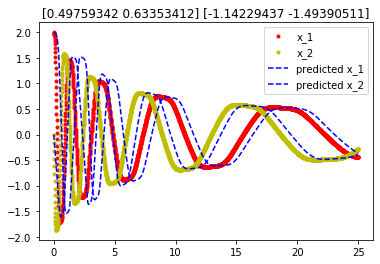

Shape of the dataframe is: (2500, 3)
Shape of the dataframe is: (2500, 3)
Target: x_component, CV Pearson R2 coefficient: 0.999874
Target: y_component, CV Pearson R2 coefficient: 0.999810
Average training score: 0.9998422130483933
Real data:


,x_component,y_component
Strain,,
2,2.000000,0.000000
2,1.992028,-0.159044
2,1.983873,-0.316164
2,1.974847,-0.471225
2,1.963856,-0.623866
...,...,...
2,-0.441769,-0.288236
2,-0.442157,-0.286486
2,-0.442536,-0.284731


Predicted data:


,x_component,y_component
Time,,
0.00,2.000000,0.000000
0.01,1.997281,-0.060597
0.02,1.994562,-0.121128
0.03,1.991836,-0.181653
0.04,1.989134,-0.242178
...,...,...
24.95,-0.285801,0.491684
24.96,-0.283340,0.492025
24.97,-0.280875,0.492345


./source/predict_onestep.py:217: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  rmse = math.sqrt(quad(integrand,min(times),max(times),limit=200)[0])
./source/predict_onestep.py:222: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  rmsep = math.sqrt(quad(percent_integrand,min(times),max(times),limit=200)[0])


ML Fit: x_component 5.51115536281348 RMSE percentage: 327.7213413876253
ML Fit: y_component 5.290520292221697 RMSE percentage: 244.95219201457638
ML model aggregate error
Average RMSE: 5.400837827517589
Total percentage error: 286.3367667011008


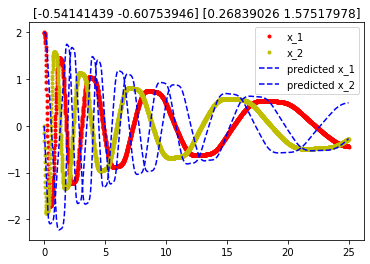

Shape of the dataframe is: (2500, 3)
Shape of the dataframe is: (2500, 3)
Target: x_component, CV Pearson R2 coefficient: 0.999966
Target: y_component, CV Pearson R2 coefficient: 0.999956
Average training score: 0.9999607498061212
Real data:


,x_component,y_component
Strain,,
2,2.000000,0.000000
2,1.992028,-0.159044
2,1.983873,-0.316164
2,1.974847,-0.471225
2,1.963856,-0.623866
...,...,...
2,-0.441769,-0.288236
2,-0.442157,-0.286486
2,-0.442536,-0.284731


Predicted data:


,x_component,y_component
Time,,
0.00,2.000000,0.000000
0.01,1.999642,-0.008856
0.02,1.999283,-0.017705
0.03,1.998925,-0.026554
0.04,1.998566,-0.035401
...,...,...
24.95,-0.359758,0.501635
24.96,-0.357097,0.502433
24.97,-0.354425,0.503198


./source/predict_onestep.py:217: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  rmse = math.sqrt(quad(integrand,min(times),max(times),limit=200)[0])
./source/predict_onestep.py:222: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  rmsep = math.sqrt(quad(percent_integrand,min(times),max(times),limit=200)[0])


ML Fit: x_component 5.733611019240488 RMSE percentage: 351.33483746841995
ML Fit: y_component 5.253261398883728 RMSE percentage: 167.71962908939412
ML model aggregate error
Average RMSE: 5.493436209062108
Total percentage error: 259.52723327890703


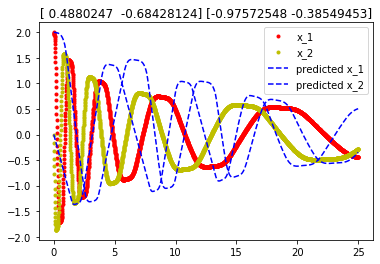

Shape of the dataframe is: (2500, 3)
Shape of the dataframe is: (2500, 3)
Target: x_component, CV Pearson R2 coefficient: 0.999954
Target: y_component, CV Pearson R2 coefficient: 0.999965
Average training score: 0.9999599583105573
Real data:


,x_component,y_component
Strain,,
2,2.000000,0.000000
2,1.992028,-0.159044
2,1.983873,-0.316164
2,1.974847,-0.471225
2,1.963856,-0.623866
...,...,...
2,-0.441769,-0.288236
2,-0.442157,-0.286486
2,-0.442536,-0.284731


Predicted data:


,x_component,y_component
Time,,
0.00,2.000000,0.000000
0.01,1.999184,-0.016219
0.02,1.998369,-0.032438
0.03,1.997553,-0.048657
0.04,1.996737,-0.064874
...,...,...
24.95,0.997139,0.858897
24.96,1.005196,0.842678
24.97,1.013252,0.826459


./source/predict_onestep.py:217: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  rmse = math.sqrt(quad(integrand,min(times),max(times),limit=200)[0])
./source/predict_onestep.py:222: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  rmsep = math.sqrt(quad(percent_integrand,min(times),max(times),limit=200)[0])


ML Fit: x_component 6.047290875607342 RMSE percentage: 429.17720701274743
ML Fit: y_component 6.873534907035898 RMSE percentage: 223.54707301976666
ML model aggregate error
Average RMSE: 6.46041289132162
Total percentage error: 326.36214001625706


./source/predict_onestep.py:222: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  rmsep = math.sqrt(quad(percent_integrand,min(times),max(times),limit=200)[0])


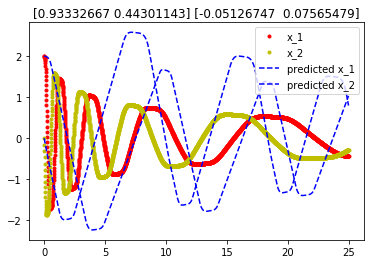

Shape of the dataframe is: (2500, 3)
Shape of the dataframe is: (2500, 3)
Target: x_component, CV Pearson R2 coefficient: 0.999872
Target: y_component, CV Pearson R2 coefficient: 0.999864
Average training score: 0.9998682165873534
Real data:


,x_component,y_component
Strain,,
2,2.000000,0.000000
2,1.992028,-0.159044
2,1.983873,-0.316164
2,1.974847,-0.471225
2,1.963856,-0.623866
...,...,...
2,-0.441769,-0.288236
2,-0.442157,-0.286486
2,-0.442536,-0.284731


Predicted data:


,x_component,y_component
Time,,
0.00,2.000000,0.000000
0.01,1.998611,-0.030882
0.02,1.997223,-0.061763
0.03,1.995834,-0.092645
0.04,1.994444,-0.123527
...,...,...
24.95,0.422826,-0.431186
24.96,0.421087,-0.432600
24.97,0.419318,-0.433995


./source/predict_onestep.py:217: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  rmse = math.sqrt(quad(integrand,min(times),max(times),limit=200)[0])
./source/predict_onestep.py:222: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  rmsep = math.sqrt(quad(percent_integrand,min(times),max(times),limit=200)[0])


ML Fit: x_component 5.534574342503783 RMSE percentage: 319.6964672637937
ML Fit: y_component 5.34902938505844 RMSE percentage: 227.56804358070414
ML model aggregate error
Average RMSE: 5.441801863781111
Total percentage error: 273.63225542224893


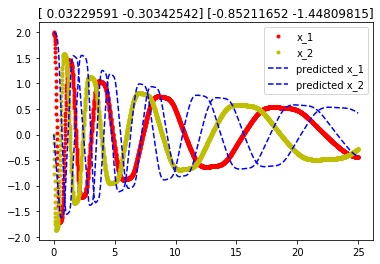

Shape of the dataframe is: (2500, 3)
Shape of the dataframe is: (2500, 3)
Target: x_component, CV Pearson R2 coefficient: 0.999992
Target: y_component, CV Pearson R2 coefficient: 0.999990
Average training score: 0.9999908450478467
Real data:


,x_component,y_component
Strain,,
2,2.000000,0.000000
2,1.992028,-0.159044
2,1.983873,-0.316164
2,1.974847,-0.471225
2,1.963856,-0.623866
...,...,...
2,-0.441769,-0.288236
2,-0.442157,-0.286486
2,-0.442536,-0.284731


Predicted data:


,x_component,y_component
Time,,
0.00,2.000000,0.000000
0.01,1.999888,-0.004936
0.02,1.999775,-0.009872
0.03,1.999663,-0.014808
0.04,1.999551,-0.019744
...,...,...
24.95,-0.286298,-1.377827
24.96,-0.292125,-1.377120
24.97,-0.297952,-1.376386


./source/predict_onestep.py:217: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  rmse = math.sqrt(quad(integrand,min(times),max(times),limit=200)[0])
./source/predict_onestep.py:222: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  rmsep = math.sqrt(quad(percent_integrand,min(times),max(times),limit=200)[0])


ML Fit: x_component 6.529675987771551 RMSE percentage: 458.78143297818514
ML Fit: y_component 6.539063885140195 RMSE percentage: 383.5900155077726
ML model aggregate error
Average RMSE: 6.534369936455873
Total percentage error: 421.18572424297884


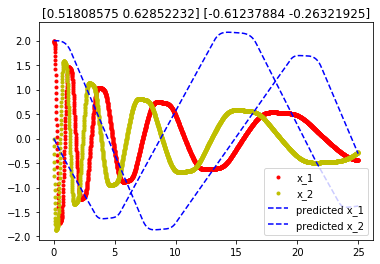

Shape of the dataframe is: (2500, 3)
Shape of the dataframe is: (2500, 3)
Target: x_component, CV Pearson R2 coefficient: 0.999840
Target: y_component, CV Pearson R2 coefficient: 0.999794
Average training score: 0.9998168292885665
Real data:


,x_component,y_component
Strain,,
2,2.000000,0.000000
2,1.992028,-0.159044
2,1.983873,-0.316164
2,1.974847,-0.471225
2,1.963856,-0.623866
...,...,...
2,-0.441769,-0.288236
2,-0.442157,-0.286486
2,-0.442536,-0.284731


Predicted data:


,x_component,y_component
Time,,
0.00,2.000000,0.000000
0.01,1.996985,-0.113601
0.02,1.993912,-0.227202
0.03,1.990457,-0.340803
0.04,1.986599,-0.454405
...,...,...
24.95,-0.075276,-0.467452
24.96,-0.077359,-0.467291
24.97,-0.079440,-0.467130


./source/predict_onestep.py:217: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  rmse = math.sqrt(quad(integrand,min(times),max(times),limit=200)[0])
./source/predict_onestep.py:222: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  rmsep = math.sqrt(quad(percent_integrand,min(times),max(times),limit=200)[0])


ML Fit: x_component 4.591988792159596 RMSE percentage: 325.5716102620386
ML Fit: y_component 4.560594765121062 RMSE percentage: 246.36074077194863
ML model aggregate error
Average RMSE: 4.5762917786403285
Total percentage error: 285.9661755169936


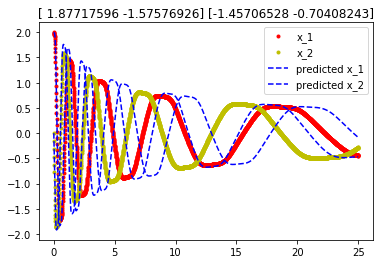

In [71]:
from utils import *
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor

# now for one-step method
# now we do the same for the test data
mse_onestep_list = []
time_points, test_data = harmonic.simulate_default()

feature_list = [] # here we do not have external time-series or control variables
target_list = ['x_component', 'y_component']
df_test = create_data(test_data, time_points, cols=target_list, num=2)

for _ in range(10):
    # generate data with random initial conditions
    xi = np.random.uniform(-2, 2, 2)
    yi = np.random.uniform(-2, 2, 2)
    time_points, data1 = harmonic.simulate_custom(xinit=xi[0], yinit=yi[0])    
    time_points, data2 = harmonic.simulate_custom(xinit=xi[1], yinit=yi[1])
                                                  
    # now generate and augment the training dataset
    df1 = create_data(data1, time_points, cols=target_list, num=0)
    df2 = create_data(data2, time_points, cols=target_list, num=1)
    df = pd.concat([df1, df2])
    df_train = train_onestep.generate_dataset(df, [0,1],feature_list, target_list, n_dim=2500)

    rf_model = RandomForestRegressor(n_estimators=20)
    figure_path = './plots/'
    rf_dict, score_dict = train_onestep.train_classic(df_train, rf_model, plot=False,model_type='random_forest', figure_path=figure_path)
    time_points, predictions = predict_onestep.predict_integrate(df_test, df, rf_dict, target_list, feature_list, title='test', plot=False,model_type='random_forest', subplots=(2,1), bio=False)
    predictions = predictions.to_numpy()
    mse1 = predict_lmmNet.compute_MSE(predictions, test_data[0], 0)
    mse2 = predict_lmmNet.compute_MSE(predictions, test_data[0], 1)
    mse_onestep_list.append((mse1, mse2))
    
    # plot
    plt.plot(time_points, test_data[0,:,0], 'r.', label='x_1')
    plt.plot(time_points, test_data[0,:,1], 'y.', label='x_2')
    plt.plot(time_points, predictions[:,0], 'b--', label='predicted x_1')
    plt.plot(time_points, predictions[:,1], 'b--', label='predicted x_2')
    plt.title(str(xi) + " " + str(yi))
    plt.legend()
    plt.show()

## 0. Wasserstein Distance and KL Divergence

In [ ]:
from utils import *
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor

# now for one-step method
# now we do the same for the test data
mse_onestep_list = []
time_points, test_data = harmonic.simulate_custom(xinit=0, yinit=0)

feature_list = [] # here we do not have external time-series or control variables
target_list = ['x_component', 'y_component']
df_test = create_data(test_data, time_points, cols=target_list, num=2)

for _ in range(10):
    # generate data with random initial conditions
    xi = np.random.uniform(-2, 2, 2)
    yi = np.random.uniform(-2, 2, 2)
    time_points, data1 = harmonic.simulate_custom(xinit=xi[0], yinit=yi[0])    
    time_points, data2 = harmonic.simulate_custom(xinit=xi[1], yinit=yi[1])
                                                  
    # now generate and augment the training dataset
    df1 = create_data(data1, time_points, cols=target_list, num=0)
    df2 = create_data(data2, time_points, cols=target_list, num=1)
    df = pd.concat([df1, df2])
    df_train = train_onestep.generate_dataset(df, [0,1],feature_list, target_list, n_dim=2500)

    rf_model = RandomForestRegressor(n_estimators=20)
    figure_path = './plots/'
    rf_dict, score_dict = train_onestep.train_classic(df_train, rf_model, plot=False,model_type='random_forest', figure_path=figure_path)
    time_points, predictions = predict_onestep.predict_integrate(df_test, df, rf_dict, target_list, feature_list, title='test', plot=False,model_type='random_forest', subplots=(2,1), bio=False)
    predictions = predictions.to_numpy()
    mse1 = predict_lmmNet.compute_MSE(predictions, test_data[0], 0)
    mse2 = predict_lmmNet.compute_MSE(predictions, test_data[0], 1)
    mse_onestep_list.append((mse1, mse2))
    
    # plot
    plt.plot(time_points, test_data[0,:,0], 'r.', label='x_1')
    plt.plot(time_points, test_data[0,:,1], 'y.', label='x_2')
    plt.plot(time_points, predictions[:,0], 'b--', label='predicted x_1')
    plt.plot(time_points, predictions[:,1], 'b--', label='predicted x_2')
    plt.title(str(xi) + " " + str(yi))
    plt.legend()
    plt.show()

## 1. Performance improvement with Epochs

Text(0.5, 1.0, 'Predicted Trajectories of 2D Yeast Glycolytic Oscillator')

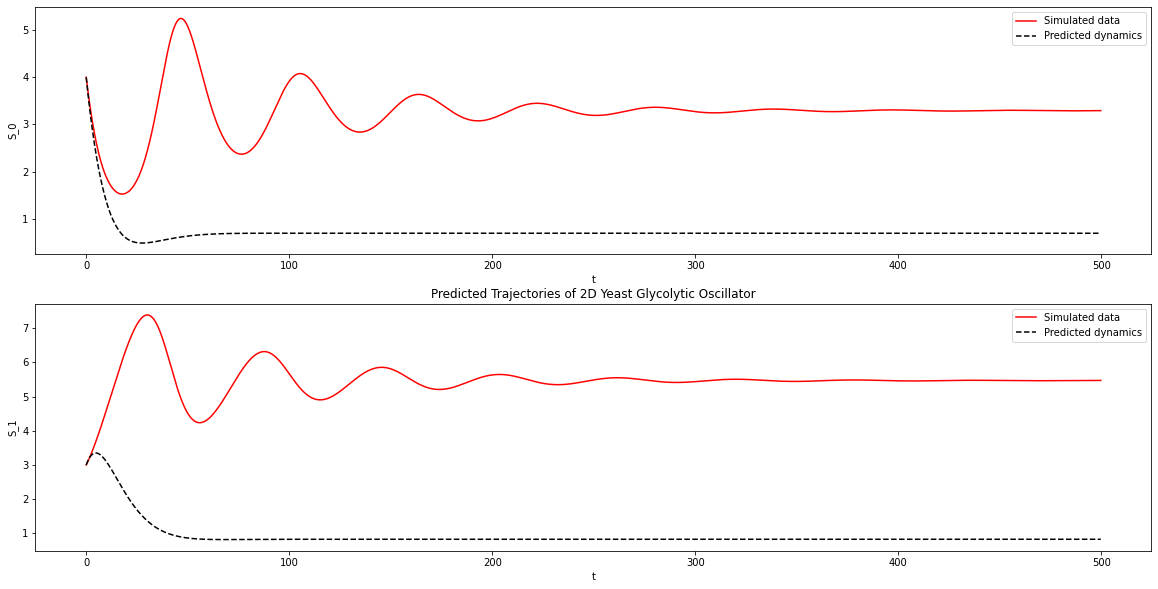

In [4]:
# test if it works for 5 epochs
net = lmmNet(h, data, M, scheme, hidden_layer_units)
N_Iter = 5
net.train(N_Iter)
pred = odeint(predict_fn, x0, time_points, args=(net,))

plt.figure(figsize=(20, 10))

for species in range(2):
    plt.subplot(2,1,species + 1)
    plt.plot(time_points, data[0, :, species], 'r-', label='Simulated data')
    plt.plot(time_points, pred[:,species], 'k--', label='Predicted dynamics')
    plt.xlabel('t')
    plt.ylabel('S_' + str(species))
    plt.legend()
    
plt.title('Predicted Trajectories of 2D Yeast Glycolytic Oscillator')


Text(0.5, 1.0, 'Predicted Trajectories of 2D Yeast Glycolytic Oscillator')

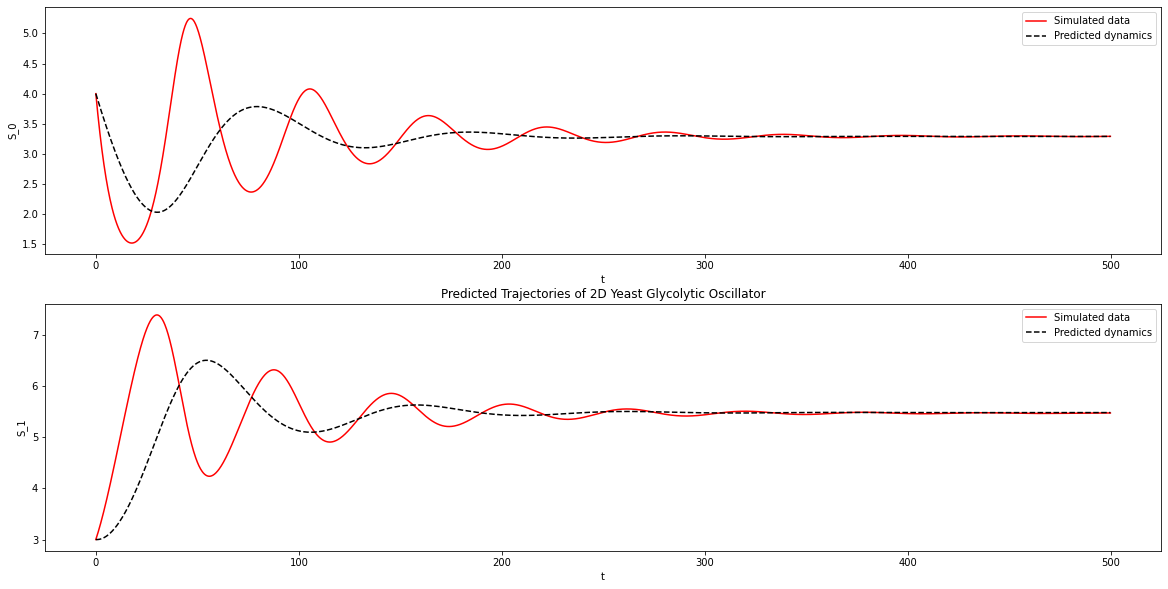

In [5]:
# test for 100 epochs

net = lmmNet(h, data, M, scheme, hidden_layer_units)
N_Iter = 100
net.train(N_Iter)
pred = odeint(predict_fn, x0, time_points, args=(net,))

plt.figure(figsize=(20, 10))

for species in range(2):
    plt.subplot(2,1,species + 1)
    plt.plot(time_points, data[0, :, species], 'r-', label='Simulated data')
    plt.plot(time_points, pred[:,species], 'k--', label='Predicted dynamics')
    plt.xlabel('t')
    plt.ylabel('S_' + str(species))
    plt.legend()
    
plt.title('Predicted Trajectories of 2D Yeast Glycolytic Oscillator')


Text(0.5, 1.0, 'Predicted Trajectories of 2D Yeast Glycolytic Oscillator')

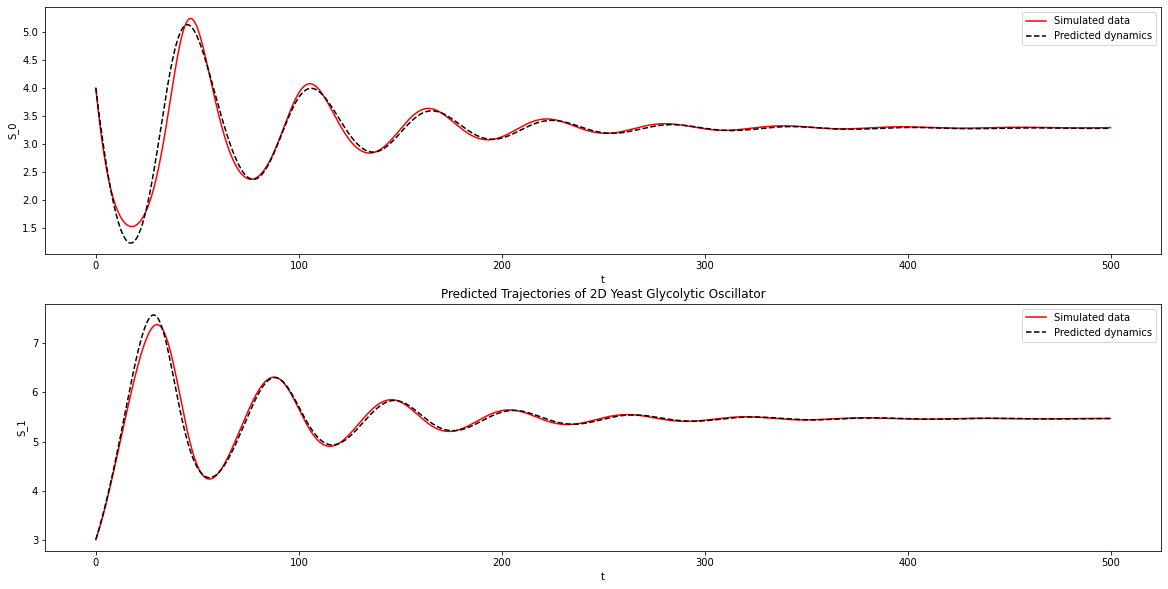

In [7]:
# test for 1000 epochs

net = lmmNet(h, data, M, scheme, hidden_layer_units)
N_Iter = 1000
net.train(N_Iter)
pred = odeint(predict_fn, x0, time_points, args=(net,))

plt.figure(figsize=(20, 10))

for species in range(2):
    plt.subplot(2,1,species + 1)
    plt.plot(time_points, data[0, :, species], 'r-', label='Simulated data')
    plt.plot(time_points, pred[:,species], 'k--', label='Predicted dynamics')
    plt.xlabel('t')
    plt.ylabel('S_' + str(species))
    plt.legend()
    
plt.title('Predicted Trajectories of 2D Yeast Glycolytic Oscillator')


Text(0.5, 1.0, 'Predicted Trajectories of 2D Yeast Glycolytic Oscillator')

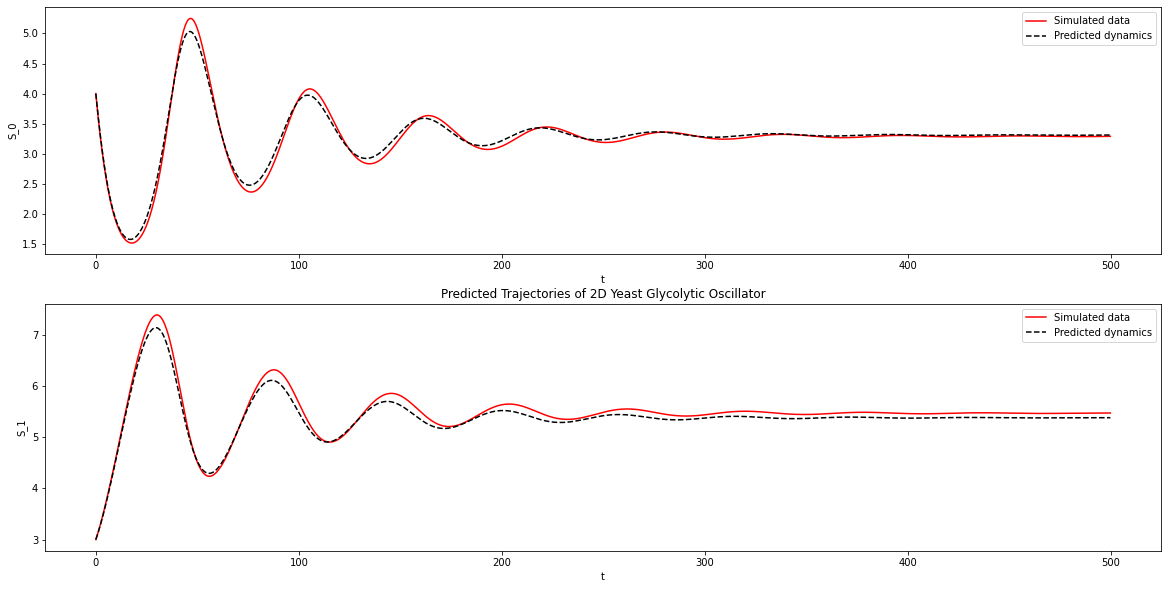

In [8]:
# test for 10000 epochs

net = lmmNet(h, data, M, scheme, hidden_layer_units)
N_Iter = 10000
net.train(N_Iter)
pred = odeint(predict_fn, x0, time_points, args=(net,))

plt.figure(figsize=(20, 10))

for species in range(2):
    plt.subplot(2,1,species + 1)
    plt.plot(time_points, data[0, :, species], 'r-', label='Simulated data')
    plt.plot(time_points, pred[:,species], 'k--', label='Predicted dynamics')
    plt.xlabel('t')
    plt.ylabel('S_' + str(species))
    plt.legend()
    
plt.title('Predicted Trajectories of 2D Yeast Glycolytic Oscillator')


## 2. Plot performance

Note that here we use normalized MSE.

In [72]:
# 2-D Harmonic
avg_mse_onestep = []
for mse_tuple in mse_onestep_list:
    avg_mse_onestep.append(np.mean(mse_tuple))
print("Total average for harmonic oscillator: ", np.mean(avg_mse_onestep))
avg_mse_onestep

Total average for harmonic oscillator:  1.645349227826958


[1.2076881957869958,
 1.519379063885813,
 1.5231318676578391,
 1.3885513637693307,
 1.722834886165674,
 1.7525795471089403,
 2.059801843647538,
 1.735859350058288,
 2.084077499039406,
 1.4595886611497564]

In [32]:
# 2-D Harmonic
avg_mse_lmmnet = []
for mse_tuple in mse_lmmnet_list:
    avg_mse_lmmnet.append( np.mean(mse_tuple))
print("Total average: ", np.mean(avg_mse_lmmnet))
avg_mse_lmmnet

Total average:  0.09058012319572831


[0.03113665221561353,
 0.06083492850992751,
 0.09859113281666126,
 0.06717392840226048,
 0.11358646567144451,
 0.10079804349803695,
 0.09884203884941123,
 0.06969103907743827,
 0.11050737540523334,
 0.15463962751125593]

In [67]:
# 3-D Linear
avg_mse_onestep = []
for mse_tuple in mse_onestep_list:
    avg_mse_onestep.append(np.mean(mse_tuple))
print("Total average: ", np.mean(avg_mse_onestep))
avg_mse_onestep

Total average:  0.1777075215185603


[0.13640009986426432,
 0.13093067741340855,
 0.17605501795265677,
 0.16792623858247335,
 0.17596445216763487,
 0.1230174243271155,
 0.2417527072984077,
 0.19128956935085947,
 0.2548102857363122,
 0.17892874249247037]

In [43]:
# 3-D Linear
avg_mse_lmmnet = []
for mse_tuple in mse_lmmnet_list:
    avg_mse_lmmnet.append( np.mean(mse_tuple))
print("Total average for 3D Oscillator: ", np.mean(avg_mse_lmmnet))
avg_mse_lmmnet

Total average for 3D Oscillator:  0.06946164759047663


[0.051517653199807605,
 0.08696028644373437,
 0.08995361067032114,
 0.056187609986527526,
 0.09795619912339225,
 0.05479535300628452,
 0.03667910177162205,
 0.07751775310831675,
 0.032324612452840164,
 0.11072429614191988]